<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Иван!</b>
    
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их, это поможет сократить время проверки на повторных ревью.Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смог развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Задача-проекта" data-toc-modified-id="Задача-проекта-1.1">Задача проекта</a></span></li><li><span><a href="#Описание-даннных" data-toc-modified-id="Описание-даннных-1.2">Описание даннных</a></span></li></ul></li><li><span><a href="#Проект" data-toc-modified-id="Проект-2">Проект</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-данных" data-toc-modified-id="Выгрузка-данных-2.1">Выгрузка данных</a></span><ul class="toc-item"><li><span><a href="#Первичиный-анализ" data-toc-modified-id="Первичиный-анализ-2.1.1">Первичиный анализ</a></span></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-2.1.2">Статистический анализ</a></span><ul class="toc-item"><li><span><a href="#Возраст-автомобиля-и-виновность-в-аварии." data-toc-modified-id="Возраст-автомобиля-и-виновность-в-аварии.-2.1.2.1">Возраст автомобиля и виновность в аварии.</a></span></li><li><span><a href="#Тип-КПП-и-виновность-в-дтп" data-toc-modified-id="Тип-КПП-и-виновность-в-дтп-2.1.2.2">Тип КПП и виновность в дтп</a></span></li></ul></li><li><span><a href="#Выгрузка-данных-для-DF" data-toc-modified-id="Выгрузка-данных-для-DF-2.1.3">Выгрузка данных для DF</a></span></li><li><span><a href="#Шаг-2.-Проведите-первичное-исследование-таблиц" data-toc-modified-id="Шаг-2.-Проведите-первичное-исследование-таблиц-2.1.4"><strong>Шаг 2. Проведите первичное исследование таблиц</strong></a></span></li><li><span><a href="#Шаг-3.-Проведите-статистический-анализ-факторов-ДТП" data-toc-modified-id="Шаг-3.-Проведите-статистический-анализ-факторов-ДТП-2.1.5"><strong>Шаг 3. Проведите статистический анализ факторов ДТП</strong></a></span></li></ul></li><li><span><a href="#Распределеные-данных--по-столбцам" data-toc-modified-id="Распределеные-данных--по-столбцам-2.2">Распределеные данных  по столбцам</a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.2.1">Дубликаты</a></span></li><li><span><a href="#CASE_ID,-ID_1,-ID_2" data-toc-modified-id="CASE_ID,-ID_1,-ID_2-2.2.2">CASE_ID, ID_1, ID_2</a></span></li><li><span><a href="#county_city_location" data-toc-modified-id="county_city_location-2.2.3">county_city_location</a></span></li><li><span><a href="#county_location" data-toc-modified-id="county_location-2.2.4">county_location</a></span></li><li><span><a href="#distance" data-toc-modified-id="distance-2.2.5">distance</a></span></li><li><span><a href="#direction" data-toc-modified-id="direction-2.2.6">direction</a></span></li><li><span><a href="#intersection" data-toc-modified-id="intersection-2.2.7">intersection</a></span></li><li><span><a href="#weather_1" data-toc-modified-id="weather_1-2.2.8">weather_1</a></span></li><li><span><a href="#location_type" data-toc-modified-id="location_type-2.2.9">location_type</a></span></li><li><span><a href="#collision_damage" data-toc-modified-id="collision_damage-2.2.10">collision_damage</a></span></li><li><span><a href="#party_count" data-toc-modified-id="party_count-2.2.11">party_count</a></span></li><li><span><a href="#primary_collision_factor" data-toc-modified-id="primary_collision_factor-2.2.12">primary_collision_factor</a></span></li><li><span><a href="#pcf_violation_category" data-toc-modified-id="pcf_violation_category-2.2.13">pcf_violation_category</a></span></li><li><span><a href="#type_of_collision" data-toc-modified-id="type_of_collision-2.2.14">type_of_collision</a></span></li><li><span><a href="#motor_vehicle_involved_with" data-toc-modified-id="motor_vehicle_involved_with-2.2.15">motor_vehicle_involved_with</a></span></li><li><span><a href="#road_surface" data-toc-modified-id="road_surface-2.2.16">road_surface</a></span></li><li><span><a href="#road_condition_1" data-toc-modified-id="road_condition_1-2.2.17">road_condition_1</a></span></li><li><span><a href="#lighting" data-toc-modified-id="lighting-2.2.18">lighting</a></span></li><li><span><a href="#control_device" data-toc-modified-id="control_device-2.2.19">control_device</a></span></li><li><span><a href="#collision_date" data-toc-modified-id="collision_date-2.2.20">collision_date</a></span></li><li><span><a href="#collision_time" data-toc-modified-id="collision_time-2.2.21">collision_time</a></span></li><li><span><a href="#party_number_1" data-toc-modified-id="party_number_1-2.2.22">party_number_1</a></span></li><li><span><a href="#party_type" data-toc-modified-id="party_type-2.2.23">party_type</a></span></li><li><span><a href="#at_fault" data-toc-modified-id="at_fault-2.2.24">at_fault</a></span></li><li><span><a href="#insurance_premium" data-toc-modified-id="insurance_premium-2.2.25">insurance_premium</a></span></li><li><span><a href="#party_sobriety" data-toc-modified-id="party_sobriety-2.2.26">party_sobriety</a></span></li><li><span><a href="#party_drug_physical" data-toc-modified-id="party_drug_physical-2.2.27">party_drug_physical</a></span></li><li><span><a href="#cellphone_in_use" data-toc-modified-id="cellphone_in_use-2.2.28">cellphone_in_use</a></span></li><li><span><a href="#party_number_2" data-toc-modified-id="party_number_2-2.2.29">party_number_2</a></span></li><li><span><a href="#vehicle_type" data-toc-modified-id="vehicle_type-2.2.30">vehicle_type</a></span></li><li><span><a href="#vehicle_transmission" data-toc-modified-id="vehicle_transmission-2.2.31">vehicle_transmission</a></span></li><li><span><a href="#vehicle_age" data-toc-modified-id="vehicle_age-2.2.32">vehicle_age</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.33">Вывод</a></span></li></ul></li><li><span><a href="#Разбитие-на-выборки,-кодировка-и-масштабирование-данных" data-toc-modified-id="Разбитие-на-выборки,-кодировка-и-масштабирование-данных-2.3">Разбитие на выборки, кодировка и масштабирование данных</a></span><ul class="toc-item"><li><span><a href="#Выборки" data-toc-modified-id="Выборки-2.3.1">Выборки</a></span></li><li><span><a href="#OHE" data-toc-modified-id="OHE-2.3.2">OHE</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-2.3.3">Масштабирование</a></span></li></ul></li><li><span><a href="#Модели" data-toc-modified-id="Модели-2.4">Модели</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.4.1">LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.4.2">RandomForestClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.4.3">CatBoostClassifier</a></span></li><li><span><a href="#Нейроная-сеть" data-toc-modified-id="Нейроная-сеть-2.4.4">Нейроная сеть</a></span></li><li><span><a href="#Оценка-лучшей-модели." data-toc-modified-id="Оценка-лучшей-модели.-2.4.5">Оценка лучшей модели.</a></span><ul class="toc-item"><li><span><a href="#cellphone_in_use" data-toc-modified-id="cellphone_in_use-2.4.5.1">cellphone_in_use</a></span></li></ul></li><li><span><a href="#Шаг-6.--Проверьте-лучшую-модель-в-работе" data-toc-modified-id="Шаг-6.--Проверьте-лучшую-модель-в-работе-2.4.6">Шаг 6.  Проверьте лучшую модель в работе</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5">Вывод</a></span></li></ul></li></ul></div>

# Описание проекта

## Задача проекта

Необходимо создать систему для оценки рисков ДТП по выбраному маршруту. Под риском понимается вероятнгсть ДТП с любым повреждением транспротного свредства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика: 
1. Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)
 - Для модели выбрать тип виновника — только машина (car).
 - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
 - Для моделирования ограничиться данными за 2012 год — они самые свежие.
 - Обязательное условие — учесть фактор возраста автомобиля.
2. На основе модели исследовать основные факторы ДТП.
3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
 - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
 - Какие ещё факторы нужно учесть?
 - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?


Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы. 

## Описание даннных

Таблица `collision` - информация о проишествиях

| Обозначение в таблице | Описание | Подробнее |
|---------------------|--------|-------------------|
| CASE_ID |<p>Индификационный номер в базе данных</p>| <p>Уникальный номер для зарегистрированного происшествия в таблице происшествий. </p>|
|COLLISION_DATE|<p>Дата проишествия</p>|<p>Формат год/месяц/день</p>|
|COLLISION_TIME|<p>Время проишествия</p>|<p>Формат:24-часовой</p>|
|INTERSECTION|<p>Является ли место проишествия перекрестком</p>|<p>Y - Intersection (перекресток) <br> N - Not Intersection (не перекресток) <br> -- - Not stated (не указано)</p>|
|WEATHER_1|<p>Погода</p>|<p>A - Clear(Ясно) <br> B - Cloudy(Облачно) <br> C - Rainning(Облачно) <br> D - Snownig(Снегопад) <br> E - Fog(Туман) <br> F - Other (Другое) <br> G - Wind(Ветер) <br> - - Not stated(не указано)</p><br>|
|COLLISON_DAMAGE|<p>Серьёзность проишествия</p>|<p>1 - FATAL TC (не подлежить востановлению)<br>2 - SEVERE DAMAGE (Серьёзный ремонт, большая часть подзамену/Серьёзное повреждение капитального стоения <br> 3 - MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло <br> 4 - SMALL DAMAGE (Отдельный элемент кузова под замену/покраска) <br> 0 -  SCRATCH (царапина)</p>|
|PRIMARY_COLL_FACTOR|<p>Основной фактор аварий</p>|<p> A - Code Violation (Нарушение правил ПДД) <br> B - Other Improper Driving (Другое направильное вождение) <br> C - Other Than Driver (Кроме водителя) <br> D - Unknown (Неизвестно) <br> E - Fell Asleep (Заснул) <br> - - Not Stated (Не указано)</p>|
|ROAD_SURFACE|<p>Состояние дороги</p>|<p>A - Dry (сухая) <br> B - Wet (Мокрая) <br> C - Snowy or Icy (Заснеженная или обледенелая) <br> D - Slippery (Muddy, Oily, ect.)(Скользкая,грязная,маслянистая и т.д.) <br> - - Not Stated(Не указано)</p>|
|LIGHTING|<p>Освещение</p>|<p>A - Daylight(Дневной свет) <br> B - Dusk-Dawn (Сумерки-Рассвет) <br> C - Dark-Street Lights (Темно-Уличные фонари) <br> D - Dark-No Street Lights (Темно-Нет уличных фонарей) <br> E - Dark-Street Lights Not Functioning (Темно-уличные фонари не работают) <br> - - Not State (Не указано)</p>|
|COUNTY_CITY_LOCATION|<p>Номер географических районов, где произошло ДТП</p>|<p>Число</p>|
|COUNTY_LOCATION|<p>Название географических районов, где произошло ДТП</p>|<p>Список разных названий, категориальный тип данных</p>|
|DIRECTION|<p>Направление движения</p>|<p> N - North (Север) <br> E - East (Восток) <br> S - South (Юг) <br> W - West (Запад) - or blank - Not state (не указано) <br> на перекрестке</p>|
|DISTANCE|<p>Растояние от главной дороги (метры)</p>|<p>Число</p>|
|LOCATION_TYPE|<p>Тип дороги</p>|<p> H - Highway(Шоссе) <br> I - Intersection (Перекресток) <br> R - Ramp (or Collector) (Рампа) <br> - or blank - Not State (не указано) </p>|
|PARTY_COUNT|<p>Количестко участников</p>|<p>Число</p>|
|PCF_VIOLATION_CATEGORY|<p>Категория нарушения</p>|<p>01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения)<br>02 — Impeding Traffic (Препятствие движению транспорта)<br>03 — Unsafe Speed (Превышение скорости)<br>04 — Following Too Closely (Опасное сближение)<br>05 — Wrong Side of Road (Неправильная сторона дороги)<br>06 — Improper Passing (Неправильное движение)<br>07 — Unsafe Lane Change (Небезопасная смена полосы движения)<br>08 — Improper Turning (Неправильный поворот)<br>09 — Automobile Right of Way (Автомобильное право проезда)<br>10 — Pedestrian Right of Way (Пешеходное право проезда)<br>11 — Pedestrian Violation (Нарушение пешеходами)<br>12 — Traffic Signals and Signs (Дорожные сигналы и знаки)<br>13 — Hazardous Parking (Неправильная парковка)<br>14 — Lights (Освещение)<br>15 — Brakes (Тормоза)<br>16 — Other Equipment (Другое оборудование)<br>17 — Other Hazardous Violation (Другие нарушения)<br>18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)<br>19 — Speeding (Скорость)<br>20 — Pedestrian dui (Нарушение пешехода)<br>21 — Unsafe Starting or Backing (Опасный старт)<br>22 — Other Improper Driving (Другое неправильное вождение)<br>23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)<br>24 — Fell Asleep (Заснул)<br>00 — Unknown (Неизвестно)<br>- — Not Stated (Не указано)</p>|
|TYPE_OF_COLLISION|<p>Аварии</p>|<p>A — Head-On (Лоб в лоб)<br>B — Sideswipe (Сторона)<br>C — Rear End (Столкновение задней частью)<br>D — Broadside (Боковой удар)<br>E — Hit Object (Удар объекта)<br>F — Overturned (Опрокинутый)<br>G — Vehicle (транспортное средство/ Пешеход)<br>H — Other (Другое)<br>- — Not Stated (Не указано)</p>|
|MOTOR_VEHICLE_INVOLVED_WITH|<p>Дополнительные участники ДТП</p>|<p>Other motor vehicle (Другой автомобиль)<br>Fixed object (Неподвижный объект)<br>Parked motor vehicle (Припаркованный автомобиль)<br>Pedestrian (Пешеход)<br>Bicycle (Велосипедист)<br>Non-collision (Не столкновение)<br>Other object (Другой объект)<br>Motor vehicle on other roadway (Автомобиль на другой проезжей)<br>Animal (Животное)<br>Train (Поезд)</p>|
|ROAD_CONDITION_1|<p> Дорожное состояние</p>|<p>A — Holes, Deep Ruts (Ямы, глубокая колея)<br>B — Loose Material on Roadway (Сыпучий материал на проезжей части)<br>C — Obstruction on Roadway (Препятствие на проезжей части)<br>D — Construction or Repair Zone (Зона строительства или ремонта)<br>E — Reduced Roadway Width (Уменьшенная ширина проезжей части)<br>F — Flooded (Затоплено)<br>G — Other (Другое)<br>H — No Unusual Condition (Нет ничего необычного)<br>- — Not Stated (Не указано)</p>|
|CONTROL_CONDITION_1|<p> Устройство управления</p>|<p>A — Functioning (Функционирует)<br>B — Not Functioning (Не функционирует)<br>C — Obscured (Затемнённый)<br>D — None (Нет)<br>- — Not Stated (Не указано)</p>|

Таблица `Parties` - Описание участников проишествия

|Обозначение в таблице|Описание|Подробнее|
|---------------------|--------|------------------|
|CASE_ID|<p>Идентификационный номер в базе данных</p>|<p>Уникальный номер для зарегестрированного проишествия в таблице проишествий</p>|
|PARTY_NUMBER|<p>Номер участника проишествия</p>|<p> От 1 до N - по числу участников проишествия </p>|
|PARTY_TYPE|<p>Тип участника проишествия</p>|<p>1 — Car (Авто)<br>2 — Road bumper (Дорожные знаки)<br>3 — Building (Строения)<br>4 — Road signs (Отбойник)<br>5 — Other (Другое)<br>6 — Operator (Оператор)<br>- — Not Stated (Не указано)</p>|
|AT_FAULT|<p>Виновность участника</p>|<p>0/1</p>|
|INSURANCE_PREMIUM|<p>Сумма страховки (тыс.$) </p>|<p>Число</p>|
|PARTY_DRUG_PHYSICAL|<p>Состояние участника: физическое или с учетом принятых лекарств</p>|<p>E — Under Drug Influence (Под воздействием лекарств)<br>F — Impairment — Physical (Ухудшение состояния)<br>G — Impairment Unknown (Не известно)<br>H — Not Applicable (Не оценивался)<br>I — Sleepy/Fatigued (Сонный/Усталый)<br>- — Not Stated (Не указано)</p>|
|PARTY_SOBRIETY|<p>Трезвость участника</p>|<p>A — Had Not Been Drinking (Не пил)<br>B — Had Been Drinking, Under Influence (Был пьян, под влиянием)<br>C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)<br>D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)<br>G — Impairment Unknown (Неизвестно ухудшение)<br>H — Not Applicable (Не оценивался)<br>- — Not Stated (Не указано)</p>|
|CELLPHONE_IN_USE|<p>Наличие телефона в автомобиле (возможность||

Таблица `Vehucles` - Описание автомобиля

|Обозначение в таблице|<p>Описание</p>|<p>Подробнее</p>|
|---------------------|--------|-------------------|
|ID|<p>Индекс текущей таблицы</p>|<p>Номекр в таблице</p>|
|CASE_ID|<p>Идентификационный номер в базу данных</p>|<p>Уникальный номер для зарегестрированного проишествия в таблице проишествий</p>|
|VEHICLE_TYPE|<p>Тип кузова</p>|<p>MINIVAN<br>COUPE<br>SEDAN<br>HATCHBACK<br>OTHER</p>|
|VEHICLE_TRANSMISSION|<p>Тип КПП</p>|<p>auto (Автоматическая)<br>manual (Ручная)<br>- — Not Stated (Не указано)</p>|
|VEHICLE_AGE|<p>Возраст автомобиля (в годаз)</p>|<p> число</p>|

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть подробный вступительный комментарий и содержание.

# Проект

## Выгрузка данных

Загружаем необходимые библиотеки, создем глобальные переменные.

In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 9.6 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 51.4 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
!pip install notifiers

     |████████████████████████████████| 43 kB 849 kB/s eta 0:00:011
     |████████████████████████████████| 90 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 199 kB 6.9 MB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 3.2.0
    Uninstalling jsonschema-3.2.0:
      Successfully uninstalled jsonschema-3.2.0


In [3]:
!pip install torchmetrics

     |████████████████████████████████| 519 kB 2.1 MB/s eta 0:00:01


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Пожалуйста, в следующий раз не забывай прописывать установку дополнительно используемых библиотек, без этого код на платформе выдает ошибку и ревьюер может отправить проект обратно.

In [4]:
import warnings
import random

import pandas as pd

import matplotlib.pyplot as plt

from sqlalchemy import create_engine, text

import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,roc_curve,roc_auc_score,confusion_matrix,precision_score,recall_score

from catboost import CatBoostClassifier

from notifiers import get_notifier

import torch
import torch.nn as nn
from torchmetrics.functional.classification import binary_f1_score

from math import ceil



pd.set_option('display.max_columns', None)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

    
<b>Все отлично!👍:</b> 
    
Отлично, что все импорты собраны в одном месте в начале проекта. Это поможет в случае чего сразу увидеть, какие библиотеки следует доустановить.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

"Согласно руководству по написанию кода PEP8 все импорты должны располагаться сразу после комментариев к модулю и строк документации, но перед объявлением констант. При этом группировать их желательно в следующем порядке:

импорты из стандартной библиотеки,
импорты из сторонних библиотек,
импорты пользовательских модулей текущего проекта."
        
И между группами стоит оставлять пустую строку.
        
        
Вот еще хорошая статья:
        
https://okpython.net/python/python_uchebnik/osnovy/moduli_i_pakety_v_python.html
        
Какие модули входят в стандартную библиотеку можно посмотреть вот здесь:
        
https://docs.python.org/3/library/exceptions.html#warnings
    

In [5]:
def make_notifier(
    token='5658096333:AAHiwKbKFkFDhJH-0eSKwDeXmJnYsqXc88A',
    chat_id=-831532630):
    def f(text):
        notifier = get_notifier('telegram')
        notifier.notify(
            message=text,
            token=token,
            chat_id=chat_id)
    return f
bot_send = make_notifier()

In [6]:
CAT_COL = []
RANDOM_STATE = 30400

### Первичиный анализ 

In [7]:

db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)
engine = create_engine(connection_string)

Посмотрим на полноту таблиц.

In [8]:
query = '''
SELECT *
FROM collisions
'''
pd.read_sql_query(sql=text(query), con = engine.connect())

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0.0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1.0,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399995,4082805,1502,kern,57.0,east,0.0,clear,None,middle damage,2,vehicle code violation,pedestrian violation,other,other object,dry,normal,dark with no street lights,none,2009-01-17,21:04:00
1399996,4082820,1953,los angeles,0.0,None,1.0,clear,None,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,daylight,functioning,2009-01-18,14:20:00
1399997,4082829,1502,kern,0.0,None,1.0,clear,highway,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,dark with street lights,functioning,2009-01-17,18:06:00
1399998,4083008,4313,santa clara,20.0,east,NaN,clear,None,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,dark with street lights,functioning,2009-01-06,17:53:00


In [ ]:
query = '''
SELECT *
FROM Parties 
'''
pd.read_sql_query(sql=text(query), con = engine.connect())

In [ ]:
query = '''
SELECT *
FROM Vehicles  
'''
pd.read_sql_query(sql=text(query), con = engine.connect())

Все таблицы имеют данные. Имеется общий ключь. Теперь можно провести статистический анализ.

### Статистический анализ

Теперь можно посмотреть на какой месяц приходятся наибольшее количество аварий.

In [ ]:
query = '''
SELECT COUNT(CASE_ID),
       EXTRACT (YEAR FROM COLLISION_DATE) as Year,
       EXTRACT (MONTH FROM COLLISION_DATE) as Month
FROM collisions
GROUP BY EXTRACT (YEAR FROM COLLISION_DATE), EXTRACT(MONTH FROM COLLISION_DATE)
'''
month = pd.read_sql_query(sql=text(query), con = engine.connect())

In [ ]:
month

In [ ]:
month['year'] = month['year'].astype(int)
month['month'] = month['month'].astype(int)

In [ ]:
for year in month['year'].unique():
    plt.figure(figsize=(15,8))
    plt.xlabel("Номер месяца")
    plt.ylabel("Количество Аварий")
    plt.title(f"Количество за {year}")
    plt.bar(month.loc[month['year'] == year, 'month'].unique(),
            month.loc[month['year'] == year, 'count'])
    plt.show()

Как видно из графиков, что каждый год аварии распределены +- одинаково, но после мая 2012 года, количество резко падает. Причино этому могут быть много факторов, но скорее всего, просто перестали записывать новые данные в таблицу. Теперь для полной оценки возьмем года с 2009 по 2011 включительно.

In [ ]:
query = '''
SELECT COUNT(CASE_ID)
FROM collisions
WHERE EXTRACT (YEAR FROM COLLISION_DATE) = 2009 or EXTRACT (YEAR FROM COLLISION_DATE) = 2010 or EXTRACT (YEAR FROM COLLISION_DATE) = 2011
GROUP BY EXTRACT(MONTH FROM COLLISION_DATE)
'''
month = pd.read_sql_query(sql=text(query), con = engine.connect())

In [ ]:
month

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("Название месяца")
plt.ylabel("Количество Аварий")
plt.title("Количество аварий по месяца")
plt.bar(['январь',
         'февраль',
         'март',
         'апрель',
         'май',
         'июнь',
         'июль',
         'август',
         'сентябрь',
         'октябрь',
         'ноябрь',
         'декабрь'],month['count'])
plt.show()

Как видно, какой-то явной зависимости от месяца года или сезона нету.


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
В таблицах есть данные за разные года, поэтому стоит проверить, полные ли эти данные, прежде чем строить общую выборку по годам. Так как это может отразиться на выводах.

Для лучшего понимая таблиц можно посмотреть на следющие зависимости:
1. Как связаны состояние водителя (таблица Parties стобце PARTY_DRUG_PHYSICAL) и тип участника происшествия (таблица Parties стобце PARTY_TYPE)
2. Наличие "hands free" системы в автомобиле (таблица Parties стобце CELLPHONE_IN_USE) и виновность в аварии (таблица Parties стобце AT_FAULT)
3. Возраст автомобиля(таблица Vehicles столбце VEHICLE_AGE) и виновность в аварии (таблица Parties стобце AT_FAULT).
4. Количестов автомобилей в аварии (таблица Parties стобце PARTY_NUMBER) и дорожное состояние (таблица collisions столбец ROAD_CONDITION_1)
5. Погода (таблица collisions столбец WEATHER_1) и ментальное состояние водителя (таблица Parties стобце PARTY_DRUG_PHYSICAL)
6. Тип коробки передач (таблица Vehicles столбце VEHICLE_TRANSMISSION) и и виновность в аварии (таблица Parties стобце AT_FAULT)


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Распиши, пожалуйста, подробнее задачи, так чтобы было понятно, связь каких таблиц они включают.

Рассмотрим задачу № 3 и № 6

####  Возраст автомобиля и виновность в аварии.

Для правильной оценки данного фактора, нужно сделать следующее:
1. Создать sql-запрос
    1. Связать две таблицы Vehicles и Parties
    2. Сгрупировать их по возрасту автомобиля.
3. Почитать в процентах при каком возрасте какую долю стостовляют автомобили.
3. Построить график.
4. Сделать вывод.

In [ ]:
query = '''
SELECT VEHICLE_AGE,
       SUM(AT_FAULT),
       COUNT(AT_FAULT)
FROM Parties AS p
INNER JOIN Vehicles as v USING (CASE_ID)
GROUP BY VEHICLE_AGE
'''
age = pd.read_sql_query(sql=text(query), con = engine.connect())

In [ ]:
age

In [ ]:
age['share_ot_all'] = (age['count']/sum(age['count']))*100
age['share'] = (age['sum']/age['count'])*100
age['share_of_all'] = (age['sum']/sum(age['count']))*100

In [ ]:
age['vehicle_age'] = age['vehicle_age'].astype(str)

In [ ]:
age

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("Возраст")
plt.ylabel("Процент Аварий")
plt.title("Процент аварий в конкретном возрасте автомобиля")
plt.bar(age['vehicle_age'].values,age['share'])
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("Возраст")
plt.ylabel("Процент Аварий")
plt.title("Процент аварий с данным возрастом ко всем авариям")
plt.bar(age['vehicle_age'].values,age['share_of_all'])
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("Возраст")
plt.ylabel("Процент")
plt.title("Процент машин с данным возрастом")
plt.bar(age['vehicle_age'].values,age['share_ot_all'])
plt.show()

Как видно из графиков, распередление аварий по возрасту (график 2) и распределение возраста по всем машинам (график 3) имеют одинаковую форму, получается график №1 показывает реальное расперделение аварий по возрасту, оно сильно не зависти.

#### Тип КПП и виновность в дтп

Тут похожий алгорит:
1. sql-запрос:
    1. Объединяем две таблицы Vehicles и Parties
    2. Оставляем виновников
2. Группируем по типу
3. Считаем проценты
4. Выводим результаты и делаем выводы.

In [ ]:
query = '''
SELECT VEHICLE_TRANSMISSION,
       SUM(AT_FAULT),
       COUNT(AT_FAULT)
FROM Parties AS p
INNER JOIN Vehicles as v USING (CASE_ID)
GROUP BY VEHICLE_TRANSMISSION
'''
gear = pd.read_sql_query(sql=text(query), con = engine.connect())

In [ ]:
gear

In [ ]:
gear.loc[[2],['vehicle_transmission']] = 'unknown'

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("Тип КПП")
plt.ylabel("Количество")
plt.title("Количество виновных с разными КПП")
plt.bar(gear['vehicle_transmission'].values,gear['sum'])
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("Тип КПП")
plt.ylabel("Количество")
plt.title("Количество не виновных с разными КПП")
plt.bar(gear['vehicle_transmission'].values,gear['count']-gear['sum'])
plt.show()

Как видно из графиков сильно тип КПП не влияет на аварии.


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Для 2х задач алгоритм решения стоит осуществить, а не просто прописать.

- Создайте sql-запрос;
- Постройте график;
- Сделайте вывод.

<div class="alert alert-block alert-info">
<b>Комментраий:</b> Ну как мне кажется такого условия в задании не было:
    
    Пропишите порядок решения для двух задач из списка. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка:
        Создайте sql-запрос;
        Постройте график;
        Сделайте вывод.

Честно, я не вижу слова сделать данные задачи. Если оно требуется в условиях ревью, то пожалуйста, подскажите колегам, что бы они добавили его в задание.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, Иван, спасибо за обратную связь, дейстивтельно могут быть разночтения из-за такой формулировки. Обязательно передам коллегам, чтобы по возможности скорректировали формулировку.
    
Требования к ревью:
    
 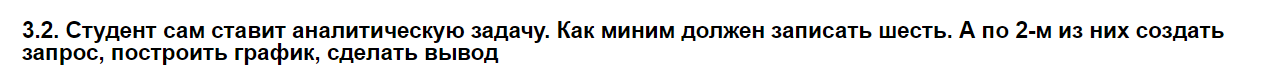

### Выгрузка данных для DF 

In [ ]:
def get_info(df):
    display(df.sample(5))
    display(df.info())

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
Перед тем как выполнять часть проекта, связанную с созданием датасета и непосредственно моделированием, стоит выполнить первую часть проекта. 
    
Какие задания туда входят:
    
### **Шаг 2. Проведите первичное исследование таблиц**

- Все ли таблицы имеют набор данных;
- Соответствует ли количество таблиц условию задачи;
- Имеется ли общий ключ для связи таблиц.

Для осмотра таблиц используйте sql-запрос.
    
### **Шаг 3. Проведите статистический анализ факторов ДТП**

1. Выясните, в какие месяцы происходит наибольшее количество аварий. Проанализируйте весь период наблюдений (таблица **collisions)**.
    - Создайте sql-запрос;
    - Постройте график;
    - Сделайте вывод.
2. Скоро состоится первое совещание вашей рабочей группы. Чтобы обсуждение было конструктивным, каждый сотрудник должен понимать данные. Для этого вы должны создать подходящие аналитические задачи и поручить их решение коллегам.
    
2.1. Создайте не менее шести задач для коллег. Опирайтесь на примеры и таблицы. 

2.2. Пропишите порядок решения для двух задач из списка. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка:

- Создайте sql-запрос;
- Постройте график;
- Сделайте вывод.
    


<div class="alert alert-block alert-info">
<b>Изменения:</b> Чуть выше сделал необходимые первичные исследования
</div>

Поскольку не понятно, что нам может пригодиться, выгрущим объедененую, полную таблицу и будем с ней рабоать.

In [ ]:
query = '''
SELECT *
FROM collisions as c
INNER JOIN Parties as p USING (CASE_ID)
INNER JOIN Vehicles as v USING (CASE_ID)
WHERE EXTRACT(YEAR FROM COLLISION_DATE) = 2012 AND PARTY_TYPE = 'car' AND c.collision_damage <> 'SCRATCH'
'''
df = pd.read_sql_query(sql=text(query), con = engine.connect())

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что соблюдаешь условия запроса.

In [ ]:
get_info(df)

После создания DF  видим столбцы с одинаковыми названиями, надо это исправить для дальнейшей работы.

In [ ]:
columns = ['case_id',
         'county_city_location',
         'county_location',
         'distance',
         'direction',
         'intersection',
         'weather_1',
         'location_type',
         'collision_damage',
         'party_count',
         'primary_collision_factor',
         'pcf_violation_category',
         'type_of_collision',
         'motor_vehicle_involved_with',
         'road_surface',
         'road_condition_1',
         'lighting',
         'control_device',
         'collision_date',
         'collision_time',
         'id_1',
         'party_number_1',
         'party_type',
         'at_fault',
         'insurance_premium',
         'party_sobriety',
         'party_drug_physical',
         'cellphone_in_use',
         'id_2',
         'party_number_2',
         'vehicle_type',
         'vehicle_transmission',
         'vehicle_age']

In [ ]:
df.columns = columns

In [ ]:
get_info(df)

Так лучше, таблица есть, столбцы на первый взгляд имеют нормальные навзания. Есть лишние это мы исправим позже.

## Распределеные данных  по столбцам

### Дубликаты

Посмотрим в первую очередь на явные дублиаты.

In [ ]:
df.drop(columns=['case_id','id_1','id_2'], axis =1).duplicated().sum()

всего 7 повторений, на 240к строк, их можно просто удалить, но для начала нужно на них взглянуть. 

In [ ]:
df.loc[df.drop(columns=['case_id','id_1','id_2'], axis =1).duplicated(keep = False)].sort_values(by='case_id')

На удивление, все столбцы заполнены, было предлополжение, что строки полупустые. В любом случае, их не много, можно убрать.

In [ ]:
col = list(df.columns)
col.remove('case_id')
col.remove('id_1')
col.remove('id_2')
df = df.drop_duplicates(subset = col).reset_index(drop=True)

In [ ]:
df.drop(columns=['case_id','id_1','id_2'], axis =1).duplicated().sum()

Дубликатов больше нет, теперь можно оценить убрать чевидно лишние столбцы и расмотреть каждый по отдельности.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что удаляешь дубликаты.

### CASE_ID, ID_1, ID_2

В нашей задаче эти столбцы не понадобятся. По этому можно их убрать.

In [ ]:
df = df.drop(columns=['case_id','id_1','id_2'], axis =1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что удаляешь неинформативные признаки.

In [ ]:
get_info(df)

Отлично, теперь остальные столбцы.

### county_city_location

По описанию, это столбец с номером географических районов, где произошло ДТП.  По логике для нашей задачи это важный столбец. Как видно из `df.info()` в этом столбце нету пропусков, но возможно есть выбросиы.

In [ ]:
df['county_city_location']

В первую очередь даный столбце можно перевести в числовой, но нужно запомнить, что он категориальный.

In [ ]:
CAT_COL.append('county_city_location')

In [ ]:
df['county_city_location'] = df['county_city_location'].astype(int)

In [ ]:
df['county_city_location']

Теперь лучше, можно сторить графики.

In [ ]:
plt.xlabel("номер локации")
plt.ylabel("количество локаций")
plt.title("Столбец county_city_location")
df['county_city_location'].hist()
plt.show()

Видно, что выбросов нет, данные распределенны, почти нормально. Так что тут больше делать нечего.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
        
Есть малые категории, возможно, их стоит объединить.

<div class="alert alert-block alert-info">
<b>Изменения:</b> Возможно
</div>

### county_location

Этот столбец имеет похожий с предыдущем сымсл, только тут непосредственно названия мест. Думаю он нам не нужен будет в обучении, так как есть предыдущий, единственное, можно проверить количество уникальных значений тут и в предыдущем, что бы понять что для каждого номера есть название.

In [ ]:
len(df['county_location'].unique())

In [ ]:
len(df['county_city_location'].unique())

Явно есть различия, посмотрим на эти названия.

In [ ]:
np.sort(df['county_location'].unique())

Как видно из названия, данные регионы достаточно крупные, возможно предыдущий столбец это код, первые две цифры код региона, а остальные это код района, проверим.

In [ ]:
len(np.unique(df['county_city_location'].unique() // 100))

Если откинуть последние две цифры, то количество уникальных значений четко совпадает с количеством регионов, что точно быть увереным что это так, посмотрим именно на уникальные пары, регион-код.

In [ ]:
hypothesis = []

In [ ]:
def apl (df):
    hypothesis.append(f"{df['county_city_location'] // 100} {df['county_location']}")

In [ ]:
df.loc[:,['county_city_location','county_location']].apply(apl, axis = 1)

In [ ]:
len(np.unique(hypothesis))

Все четко, гипотиза подтвердилась, первые цифры это код региона, так что столбец с названиями нам не понадобится. По этому можно предыдущий столбец оствить только последние две цифры, а этот столбец заменить на коды, первые две цифры

In [ ]:
df['county_location'] = df['county_city_location'] // 100
df['county_city_location'] = df['county_city_location'] % 100

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [ ]:
CAT_COL.append('county_location')

In [ ]:
get_info(df)

Идем дальше.

### distance

По описанию это растояние до главной дороги в метрах. Звучит важно, посмотрим что с цифрами тут

In [ ]:
plt.xlabel("Растояние")
plt.ylabel("количество локаций")
plt.title("Столбец distance")
df['distance'].hist()
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь стоит исправить заголовок и подпись оси y

Думаю тут лучше поможет "ящик с усами"

In [ ]:
plt.ylabel("Растояние")
plt.title("Столбец distance")
plt.boxplot(df['distance'])
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь также стоит исправить заголовок.

In [ ]:
df['distance'].describe()

Как видно есть один выброс, по скольку в 1500 км от главной жороги можно врезаться только в дерево в лесу, думаю это значение можно спокойно удалить, но прежде нужно посмотреть на это строку.

In [ ]:
df.loc[df['distance'] == df['distance'].max()]

Думаю без этих двух значений мы переживем.

In [ ]:
df = df.loc[df['distance'] != df['distance'].max()]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что обрабатываешь аномалии.

In [ ]:
plt.ylabel("Растояние")
plt.title("Столбец distance")
plt.boxplot(df['distance'])
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь также стоит исправить заголовок

In [ ]:
df['distance'].describe()

Так уже на много лучше, теперь можно оценить какие данные оставить.

Думаю если оставить 85% данных то будет в самый раз.

In [ ]:
distance_count = df['distance'].value_counts().sort_index()
leght = len(distance_count)
distance_sum = distance_count.sum()
for i in range(leght):
    if distance_count[:i+1].sum()/distance_sum > .85: 
        break
i

In [ ]:
distance_count.head(999)

Получается 85% аварий произошли в пределах 900м от главной дороги, остановимся на одном км.

In [ ]:
df = df.loc[df['distance'] <=1000].reset_index(drop=True)

In [ ]:
plt.xlabel("Растояние")
plt.ylabel("Количество событий")
plt.title("Столбец distance")
plt.hist(df['distance'])
plt.show()

In [ ]:
df['distance'].describe()

Теперь на много лучше, даже распределение получилось Геометрическим.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Скорее это геометрическое распределение, а не нормальное.

<div class="alert alert-block alert-info">
<b>Изменения:</b> Спасибо)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

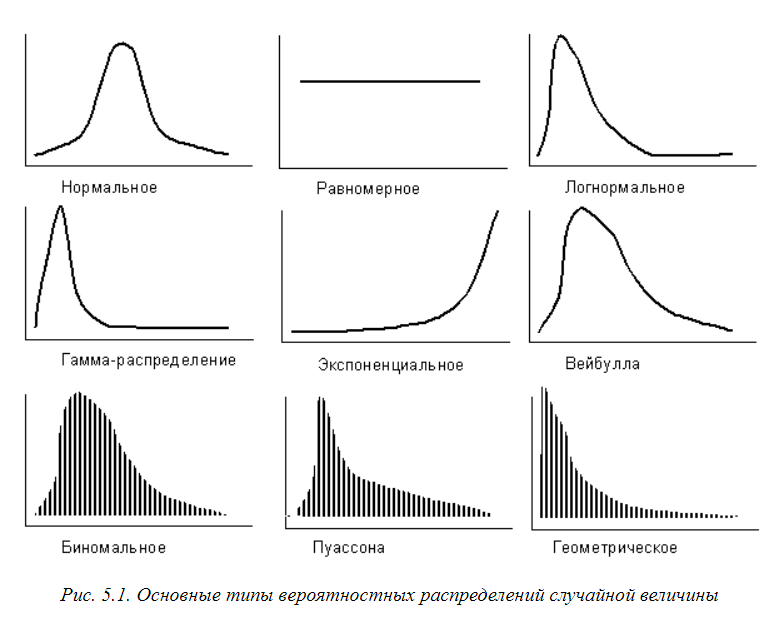

### direction

Данный столбец отвечает за направление движения, кажется что он не сильно нужен.

In [ ]:
df['direction'].isna().sum()/len(df)

При условии, что тут 31% пропусков. Убираем.

In [ ]:
df = df.drop(columns=['direction'], axis =1)
get_info(df)

Следующий

### intersection

Тут хранится информация было ли проишествие на перекрестке. Кажется, что это важный столбец, есть пропуски но их не много, думаю можно просто заполнить как не указаные.

Так же это категориальный столбец добавляем в списко.

In [ ]:
CAT_COL.append('intersection')

In [ ]:
df['intersection'].isna().sum()

In [ ]:
df['intersection'].unique()

Очень интересно, в описании написано, что тут должный быть значения *Y*, *N*, *-*, а видим *1*,*0*

По скольку тут всего 700 пропусков, это 0.4% от всей выборки, так что можно просто удалить.

In [ ]:
df = df.dropna(subset = ['intersection']).reset_index(drop=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что обрабатываешь аномальные значения.

In [ ]:
df['intersection'] = df['intersection'].astype(int)

In [ ]:
get_info(df)

Пропуски убрали, теперь посмотрим на распределение значений, есть чувство что на перекрестках аварий больше.

In [ ]:
plt.xlabel("На перекрестки ли была авария")
plt.ylabel("Количество событий")
plt.title("Столбец intersection")
plt.hist(df['intersection'])
plt.show()

Как видим все на оборот, большенство аварий были вне перекрестков.

### weather_1

Как понятно из названия, это столбец с погодой при аварии. Думаю  он сыграет свою роль при обучении, по этому обработаем его и оставим. Так же он категориальный. По скольку других столбцов с погодой нет, думаю этот можно переименовать.

In [ ]:
df = df.rename(columns={'weather_1': 'weather'})

In [ ]:
CAT_COL.append('weather')

In [ ]:
df['weather'].isna().sum()

In [ ]:
df['weather'].unique()

Тут значения совпадают с описанием, тут пропусков также очень мало, так что простот убираем.

In [ ]:
df = df.dropna(subset = ['weather']).reset_index(drop=True)

In [ ]:
get_info(df)

Отлично. Теперь посмотрим на распределение.

In [ ]:
weather = df['weather'].value_counts()

In [ ]:
plt.xlabel("Погода")
plt.ylabel("Количество случаев")
plt.title("Столбец weather")
plt.bar(weather.index,weather.values)
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для визуализации распределений данных по категориям больше подходят графики столбчатых диаграмм
        
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

<div class="alert alert-block alert-info">
<b>Изменения:</b> 👌
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [ ]:
df['weather'].value_counts()

Как видно, большинство случаев произошло в ясную и облачную погоду. Думаю что туман, снег и ветер можно объеденить в категорию "другие", по скольку их количество очень мало.

In [ ]:
df.loc[(df['weather'] == 'fog') | (df['weather'] == 'snowing') | (df['weather'] == 'wind'), 'weather'] = 'other'

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что объединяешь малые категории

In [ ]:
df['weather'].value_counts()

Теперь лучше.

### location_type

Тут описан тип дороги. Этот столбец самый бедный на информацию. Думаю можео его даже не рассматривать.

In [ ]:
df = df.drop(columns=['location_type'], axis =1)
get_info(df)

### collision_damage

Тут описаны типы повреждений автомобилей. Как мне кажется этот столбец не нужет, так как мы заранее не можем узнать силу аварии и будет ли она вообще. Этот столбец можно было бы использовать для предсказания силы повреждения, но это не наша задача. Убираем.

In [ ]:
df = df.drop(columns=['collision_damage'], axis =1)
get_info(df) 

### party_count 

Количество участников аварии, логика таже что и с силой пвреждений.

In [ ]:
df = df.drop(columns=['party_count'], axis =1)
get_info(df) 

### primary_collision_factor 

Фактор аварии, тоже долой.

In [ ]:
df = df.drop(columns=['primary_collision_factor'], axis =1)
get_info(df) 

### pcf_violation_category

Категория нарушения, не можем узнать до аварии.

In [ ]:
df = df.drop(columns=['pcf_violation_category'], axis =1)
get_info(df) 

### type_of_collision

Тип аварии, убираем.

In [ ]:
df = df.drop(columns=['type_of_collision'], axis =1)
get_info(df) 

### motor_vehicle_involved_with

Все также причина, в будущее мы не умеем смотреть, удаляем.

In [ ]:
df = df.drop(columns=['motor_vehicle_involved_with'], axis =1)
get_info(df) 

### road_surface 

Состояние дороги, наконец-то столбец с которым можно порабоать. Категориальный столбец, достаточно полный на данные. 

In [ ]:
df['road_surface'].isna().sum()

пол процента пропусков, посмотрим на остальные значения.

In [ ]:
df['road_surface'].value_counts()

Есть две основные категории, сухая и мокрая, думаю можно сделать просто, пропуски удалить, а три категории (мокрая, снежная и скользкая) объеденить в одну. Просто создав новый столбец сукхая ли дорога `wet_road`

In [ ]:
df = df.dropna(subset = ['road_surface']).reset_index(drop=True)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь ты удаляешь пропуски в столбце weather, а не в road_surface

<div class="alert alert-block alert-info">
<b>Изменения:</b> подправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [ ]:
df['wet_road'] = 1

In [ ]:
CAT_COL.append('wet_road')

In [ ]:
df.loc[df['road_surface'] == 'dry', 'wet_road'] = 0

In [ ]:
df = df.drop(columns=['road_surface'], axis =1)
get_info(df)

Отлично, идем дальше.

### road_condition_1

Даный столбец описывает состояние дорожного покрытия, кажется что даный столбец очень важен. Пропусков тут не так много.

In [ ]:
df['road_condition_1'].isna().sum()

In [ ]:
df['road_condition_1'].value_counts()

Убираем пропуски, меняем названия и идем дальше.

In [ ]:
df = df.dropna(subset = ['road_condition_1']).reset_index(drop=True)

In [ ]:
df = df.rename(columns={'road_condition_1': 'road_condition'})

In [ ]:
CAT_COL.append('road_condition')

### lighting

Дорожное освещение, очень важный столбец. 

In [ ]:
df['lighting'].isna().sum()

In [ ]:
df['lighting'].value_counts()

В принципе по распределению все не плохо, просто убирем пропуски.

In [ ]:
df = df.dropna(subset = ['lighting']).reset_index(drop=True)

In [ ]:
CAT_COL.append('lighting')

### control_device

Устройство управления, очень расплывчатое описане, не понятно про что тут говорится.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Control Devices
In a modern automobile, control devices are used to actuate door locks, deck lids, head lamp covers, windows, seats, antennas etc.
        
http://what-when-how.com/automobile/control-devices-automobile/
        
То есть - это также характеристика автомобиля.

In [ ]:
df['control_device'].value_counts()

In [ ]:
df['control_device'].isna().sum()

Оставим даный столбец, просто поступим как с состоянием дороги, пропуски заменим на отсутсвие и обеденим значения "none" и "not functioning" это 0, а "functioning" с "obscured" это 1.

In [ ]:
df['control_device'] = df['control_device'].fillna(0)
df.loc[(df['control_device'] == 'functioning') | (df['control_device'] == 'obscured'), 'control_device'] = 1
df.loc[(df['control_device'] == 'none') | (df['control_device'] == 'not functioning'), 'control_device'] = 0

In [ ]:
df['control_device'].value_counts()

In [ ]:
CAT_COL.append('control_device')

Отлично, идем дальше.

### collision_date

Дата аварии, кажется что это важный столбец, но по факту без точной географии события, он безполезен. Можно было-бы вытащить времена года, но в экваториальнеых районах нет вообще сезонности, а в другом полушарии они вообще инвертированы. Так что просто пропустим.

In [ ]:
df = df.drop(columns=['collision_date'], axis =1)
get_info(df) 

### collision_time

Тут стоит время разбить на 4 категории, утро с 6 до 12, день с 13 до 18, вечер с 19 до 23 и ночь с 00 до 5. Но опять же в зависимости от широты, это рамки будут двигаться.

In [ ]:
def get_day_time (df):
    time = df['collision_time'].hour
    if time >= 0 and time < 6: return ("night")
    elif time >= 6 and time < 13: return ("morning")
    elif time >= 13 and time < 18: return ("day")
    else: return ("evening")

In [ ]:
df['collision_time'].isna().sum()

In [ ]:
df = df.dropna(subset = ['collision_time']).reset_index(drop=True)

In [ ]:
df['collision_time'] = df.apply(get_day_time,axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что создаешь собственные признаки на основе имеющихся.

In [ ]:
df['collision_time'].value_counts()

In [ ]:
CAT_COL.append('collision_time')

In [ ]:
get_info(df)

Распределение почти равномерное, за исключением ночи.

### party_number_1

Номер участника проишествия. Думаю данный столбец нам не нужен.

In [ ]:
df = df.drop(columns=['party_number_1'], axis =1)
get_info(df) 

### party_type

Тип участника проишествия, у нас только один, машины. Так что этот столбец тоже бесполезен.

In [ ]:
df = df.drop(columns=['party_type'], axis =1)
get_info(df) 

### at_fault

Виновность участника, это основной наш столбец, который нужно научиться предсказывать.

In [ ]:
plt.xlabel("Виновность")
plt.ylabel("Количество случаев")
plt.title("Столбец at_fault")
plt.hist(df['at_fault'])
plt.show()

Распределение почти равномерно, так что этот столбец можно не трогать.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что оцениваешь баланс классов в целевом признаке.

### insurance_premium

Страховая выплата, тут для нас нету полезной информации. Так что просто удаляем.

In [ ]:
df = df.drop(columns=['insurance_premium'], axis =1)
get_info(df) 

### party_sobriety

Трезвость водителя, очень крутой параметр, но жаль нельзя его узнать до старта поездки.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Одно из возможных предложений по итогам данного исследования оборудовать автомобиль тестером на алкогольное опьянение, без использования которого поездка не начинается. Так что можно и оставить этот признак, если учесть такой вариант. И если этот признак действительно окажется важным для модели.

<div class="alert alert-block alert-info">
<b>Изменения:</b> Тут тогда встает два вопроса:
    
    1. Техническая реализация.  
    2. Если человек пьян, то нельзя ему вообще ехать за рулем и данный столбце теряет смысл.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
1. оборудовать автомобиль алкометром.
        
2. Да, здесь согласна.

In [ ]:
df = df.drop(columns=['party_sobriety'], axis =1)
get_info(df) 

### party_drug_physical

Как и предыдущий столбец, очень информативен, но информацию заранее не получить.

In [ ]:
df = df.drop(columns=['party_drug_physical'], axis =1)
get_info(df) 

### cellphone_in_use

Возможность разговора по громкой связи, прекрасный столбец. Посмотьрим на него по ближе.

In [ ]:
df['cellphone_in_use'].isna().sum()

Пропусков очень много, хотя кажется что данная информация должна быть у каршеринг фирмы. Тут тогдапросто создадим дополнительную категорию `unknown` по скольку тут почти 10% строк с пропусками.

In [ ]:
df['cellphone_in_use'] = df['cellphone_in_use'].fillna('unknown')

In [ ]:
df['cellphone_in_use'].isna().sum()

In [ ]:
df['cellphone_in_use'] = df['cellphone_in_use'].astype(str)

In [ ]:
df['cellphone_in_use'].value_counts()

In [ ]:
CAT_COL.append('cellphone_in_use')

У очень маленького количества автомобилей есть такая возможность. Очень странно для 2012 года.

### party_number_2

Тоже самое что и party_number_1.

In [ ]:
df = df.drop(columns=['party_number_2'], axis =1)
get_info(df) 

### vehicle_type

Тип кузова автомобиля, не понятно будет ли влиять данная вещь на аварии, но пусть будет.

In [ ]:
df['vehicle_type'].isna().sum()

Пропусков нет, прекрасно.

In [ ]:
plt.xlabel("Тип кузова")
plt.ylabel("Количество машин")
plt.title("Столбец vehicle_type")
plt.hist(df['vehicle_type'])
plt.show()

In [ ]:
df['vehicle_type'].value_counts()

In [ ]:
CAT_COL.append('vehicle_type')

Видим что подовляющее число имеют седаны и купе. Интересно.

### vehicle_transmission

Тип КПП. Думаю тоже важный столбец, по скольку АКПП так сказать с защитой от дураков, в отличии от МКПП.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Интересно посмотреть действительно ли больше виновных в аварии ездили на МКПП.

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сейчас и посмотрим.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [ ]:
df.loc[df['at_fault'] == 1, 'vehicle_transmission'].value_counts()

In [ ]:
df.loc[df['at_fault'] == 0, 'vehicle_transmission'].value_counts()

<div class="alert alert-block alert-info">
<b>Изменения:</b> +- одинаково
</div>

In [ ]:
df['vehicle_transmission'].isna().sum()

Пропусков достаточно много, по этому заменим их на `unknown`.

In [ ]:
df['vehicle_transmission'] = df['vehicle_transmission'].fillna('unknown')

In [ ]:
df['vehicle_transmission'].value_counts()

In [ ]:
CAT_COL.append('vehicle_transmission')

Разниица не очень большая, между МКПП и АКПП.

### vehicle_age

Возраст автомобиля, важный столбец, чем страше автомобиль, тем больше вероятность отказа.

In [ ]:
df['vehicle_age'].isna().sum()

Тут пропусков еще больше, выход тот же.

In [ ]:
df['vehicle_age'] = df['vehicle_age'].fillna(-1)

In [ ]:
df['vehicle_age'].value_counts()

Как видно, большая часть машин достаточно молодая, до 10 лет. Но есть и откровенный старичек 161 год, при условии что первый офоциальный автомобиль был создан в 1886, никакой другой не может быть старше него, это явно опечатка или что-то еще, просто уберем.

In [ ]:
df = df.loc[df['vehicle_age'] != 161].reset_index(drop=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

In [ ]:
get_info(df)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Тебе не кажется, что удачнее возраст авто оставить численным признаком и пропуски заполнить подходящим этому образом?

<div class="alert alert-block alert-info">
<b>Изменения:</b> Посещала такая идея, но видимо когда в первый раз делал, решил по дргуому.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Метрика может быть лучше.

Тут больше делать нечего.


### Вывод

Все столбцы подготовлены, лишние убраны, пропусков нет. Из изначальных 33 столбцов осталось 14 и 225778 строк удалили 34347, это почти 15% даных, считаю это допустимая потеря.

## Разбитие на выборки, кодировка и масштабирование данных

Для дальнейшего обучения моделей необходимо закодировать категориальные данные, отмасштабировать численые и разбить на необхдимые выборки.

### Выборки

In [ ]:
train, test = train_test_split(df, test_size=.2, random_state=RANDOM_STATE)
train, vall = train_test_split(train, test_size=.25, random_state=RANDOM_STATE)

In [ ]:
get_info(train)

In [ ]:
get_info(vall)

In [ ]:
get_info(test)

Есть три выборки, теперь нужно закодировать и отмасштабировать.

###  OHE

In [ ]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
encoder_ohe.fit(train[CAT_COL])

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь в процессе ревью снова упало ядро, продолжу в colab

In [ ]:
train_ohe = train.copy()
train_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(train[CAT_COL])
train_ohe = train_ohe.drop(CAT_COL, axis=1)

In [ ]:
test_ohe = test.copy()
test_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(test[CAT_COL])
test_ohe = test_ohe.drop(CAT_COL, axis=1)

In [ ]:
vall_ohe = vall.copy()
vall_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(vall[CAT_COL])
vall_ohe = vall_ohe.drop(CAT_COL, axis=1)

In [ ]:
CAT_COL

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
    
Кодирование проведено верно, молодец.

In [ ]:
get_info(train_ohe)
get_info(test_ohe)
get_info(vall_ohe)

Почти 200 столбцов, много но ничего не поделать. 

### Масштабирование

In [ ]:
X_train = train_ohe.drop('at_fault', axis=1)
Y_train = train_ohe['at_fault']
X_vall = vall_ohe.drop('at_fault', axis=1)
Y_vall = vall_ohe['at_fault']
X_test = test_ohe.drop('at_fault', axis=1)
Y_test = test_ohe['at_fault']

In [ ]:
column = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train[column])
pd.options.mode.chained_assignment = None

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Не обязательно масштабировать one-hot признаки, это не имеет особого смыслы к тому же такое центрирование может негативно сказываться на качестве модели

<div class="alert alert-block alert-info">
<b>Изменения:</b> Согласен, что можно кодировать только численые признаки, но это тогда нужно их отдельно указывать, а по факту всех предыдущих экспериментов, модлеи показывают абсолютно одинаковые результаты, с кодированием и без.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Да, все верно, можно в переменную column сохранить только численные признаки.

In [ ]:
X_train[column] = scaler.transform(X_train[column])
X_test[column] = scaler.transform(X_test[column])
X_vall[column] = scaler.transform(X_vall[column])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Алгоритм масштабирования корректный, молодец.

In [ ]:
get_info(X_train)
get_info(X_test)
get_info(X_vall)

Все готово для обучения. 

## Модели

Для решения данной задачи будем использовать будем использовать следующие модели:
- LogisticRegression
- RandomForestClassifier
- CatBoostClassifier
- Нейроная сеть

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

Прежде чем приступить к обуению нужно решить какую использовать метрику.

Как мне кажется для нашей задачи подойте Recall так как нам важно не допустить ДТП, то есть если шанс высокий но мы не предложим другой маршрут, то пострадают люди и мы получим убытки. При этом мы можем всем говорить оъезжать и не получить никакого результата, так что наш выбор падает на баланс между precision и Recall, это f1 - метрика.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть обоснование выбора метрики.

### LogisticRegression

Теперь все есть для обучения.

In [ ]:
warnings.filterwarnings("ignore")
parametrs = {"max_iter": range(100,900,100),
             "penalty": ['l1', 'l2', 'elasticnet', 'none']}
model_LR = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE,class_weight='balanced'),
                        parametrs,
                        verbose = 3,
                        cv=2,
                        scoring = 'f1')
model_LR.fit(X_train, Y_train)
display(model_LR.best_params_)
display(model_LR.best_score_)

In [ ]:
f1_score(Y_vall,model_LR.predict(X_vall))

Не высокий результат, посмотрим как себя поведут другие модели

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что подбираешь гиперпараметры.

### RandomForestClassifier

In [ ]:
parametrs = { 'max_depth': range (6,9),
                'min_samples_leaf': range (2,5),
                'min_samples_split': range (7,17,2),
                'n_estimators' : range(2,102,50)}
model_forest = GridSearchCV(RandomForestClassifier(random_state= RANDOM_STATE, class_weight = 'balanced'), 
                    parametrs, 
                    scoring = 'f1', 
                    verbose = 3,
                    cv=2)
model_forest.fit(X_train, Y_train)
display(model_forest.best_params_)
display(model_forest.best_score_)
bot_send(f'{model_forest.best_score_}')
for s in model_forest.best_params_:
    bot_send (f'{s}: {model_forest.best_params_[s]}')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Тестовая выборка - это отложенная иммитация реальных данных, стоит исключить ее использование до этапа тестирования лучшей модели. В процессе анализа моделей нам достаточно качества на кросс-валидации или на валидационной выборке (она у тебя выделена).

Хуже чем регресия.

### CatBoostClassifier

In [ ]:
parametrs = {'depth' :[2],
            'iterations' : range(100,1101,200),
            'learning_rate' : [.7,.8,.9,1],
            'l2_leaf_reg':[3]}
cbc = GridSearchCV(CatBoostClassifier(random_seed= RANDOM_STATE,
                        logging_level='Silent',
                        auto_class_weights='Balanced'), 
                    parametrs, 
                    scoring = 'f1',
                    verbose = 3,
                    cv=3)
cbc.fit(X_train, Y_train)
print (cbc.best_params_)
print (cbc.best_score_)
bot_send(f'{cbc.best_score_}')
for s in cbc.best_params_:
    bot_send (f'{s}: {cbc.best_params_[s]}')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Если значение гиперпараметра никак не изменяется, то его необязательно передавать в GridSearch, можно сразу указать необходимое значение при инициализации модели.

<div class="alert alert-block alert-info">
<b>Комментарий:</b> Это уже для себя, я же запускаю подбори несколько раз и каждый раз корректирую параметры. В данном случае просто видно, что этот параметр я перебрал и остановился на этом значении.
</div>

Катбуст показал схожие результаты с предыдущими моделями.

Посмотрим на какие элементы он больше обращал внимание.

In [ ]:
best = cbc.best_estimator_
f = best.feature_importances_
n = best.feature_names_
imp = {}
for i in range(len(f)):
    imp[n[i]] = f[i] 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
    
Молодец, что оцениваешь важность признаков для модели.

In [ ]:
proba = pd.DataFrame(list(imp.items()), columns = ['col1', 'col2'])

In [ ]:
proba

In [ ]:
(proba.loc[proba['col2'] > .5]
 .style
 .background_gradient(cmap='bwr',axis=0)
 )

Интересно, самые важные значения для модлеи были, дистанция, время столкновения - ночь и тип кузова хэчбэк. Очень интересно.

### Нейроная сеть

Большие надежды возложены на нейроную сеть, посмотрим что она может.
Для начала переведем данные в понятные для сети

In [ ]:
X_train_tn = torch.FloatTensor(X_train.values)
X_test_tn = torch.FloatTensor(X_test.values)
X_vall_tn = torch.FloatTensor(X_vall.values)
Y_train_tn = torch.FloatTensor(Y_train.values)
Y_test_tn = torch.FloatTensor(Y_test.values)
Y_vall_tn = torch.FloatTensor(Y_vall.values)

In [ ]:
count_f_n = len(X_train_tn[0])

Теперь пропробуем создать простую сеть, что бы посмотреть на что она способна.

In [ ]:
n_neurons = [count_f_n, 12, 8, 15, 6, 1]
net_layers = []

for i in range(1, len(n_neurons) - 1):
    net_layers.append(nn.Linear(n_neurons[i-1],n_neurons[i])) 
    if (i+1) % 2 == 0:
            net_layers.append(nn.Tanh()) 
net_layers.append(nn.Linear(n_neurons[-2], n_neurons[-1]))
net_layers.append(nn.Sigmoid())
net = nn.Sequential(*net_layers)

L1_train = []
L1_test = []

optimizer = torch.optim.Adam(net.parameters(),lr=1e-3)

loss = nn.BCELoss()

num_epochs = 1500
for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    
    preds = net.forward(X_train_tn).flatten()
    loss_value = loss(preds, Y_train_tn)
    loss_value.backward()
    
    optimizer.step()
    
    
    if epoch % 100 == 0 or epoch == num_epochs-1:
        train_pred = net.forward(X_train_tn).flatten()
        L1_train.append(binary_f1_score(train_pred, Y_train_tn).detach().numpy())
        net.eval()
        vall_pred = net.forward(X_vall_tn).flatten()
        L1 = binary_f1_score(vall_pred,Y_vall_tn)
        L1_test.append(L1.detach().numpy())
        print(epoch)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь у меня перестала справляться платформа, перехожу в colab

<div class="alert alert-block alert-info">
<b>Комментарий:</b> Теперь должно быть все четко. Но сразу говорю, чуть ниже, где идет подбор параметров нейроной сети, подбор займет парялка 400 минут, ту ячейку можно не запускать, она ни на что не влияет.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Я там в колабе изменила количество нейронок, чтобы побыстрее справлялась)

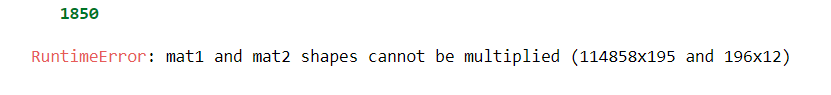

In [ ]:
x = np.array(range(0, len(L1_test)))
plt.figure(figsize=(15,8))
plt.title('Изменение ошибки на тесте и валидации от эпохи')
plt.xlabel('Номер эпохи е2')
plt.ylabel('f1')
plt.plot(x,L1_train,label='Тренировочная')
plt.plot(x,L1_test,label='Валидация')
plt.legend(loc='best', fontsize=12)
plt.show()

Очень слабый результат, возможно параметры не правильные. Попробуем перебрать несколько моделей со случаными параметрами.

In [ ]:
def create_net (count_net, first_lay, count_lays, last_lay, count_neirons, count_epochs):
    conf = []
    for g in range(count_net):
        print(g)
        l = np.random.randint(count_lays[0],count_lays[1])
        n_neurons = [first_lay]
        net_layers = []
        for j in range(l):
            n_neurons.append(np.random.randint(count_neirons[0],count_neirons[1]))
        n_neurons.append(last_lay)

        for i in range(1, len(n_neurons) - 1):
                net_layers.append(nn.Linear(n_neurons[i-1],n_neurons[i])) 
                if (i+1) % 2 == 0:
                    if l > 30:
                        net_layers.append(nn.SiLU())
                    else:
                         net_layers.append(nn.Tanh())
        net_layers.append(nn.Linear(n_neurons[-2], n_neurons[-1]))
        net_layers.append(nn.Sigmoid())
        net = nn.Sequential(*net_layers)

        L1_train = []
        L1_test = []
        
        optimizer = torch.optim.Adam(net.parameters(),lr=1e-3)
        conf.append([g,n_neurons])
        loss = nn.BCELoss()

        for epoch in range(count_epochs):
            net.train()
            optimizer.zero_grad()
            
            preds = net.forward(X_train_tn).flatten()
            loss_value = loss(preds, Y_train_tn)
            loss_value.backward()
            
            optimizer.step()
            
            if epoch % 100 == 0 or epoch == count_epochs-1:
                print(epoch)
                train_pred = net.forward(X_train_tn).flatten()
                L1_train.append(binary_f1_score(train_pred, Y_train_tn).detach().numpy())
                net.eval()
                vall_pred = net.forward(X_vall_tn).flatten()
                L1 = binary_f1_score(vall_pred,Y_vall_tn)
                L1_test.append(L1.detach().numpy())
        f1 = f1_score(Y_test_tn.detach(), np.around(net.forward(X_test_tn).flatten().detach().numpy()))
        conf[g].append(f1)
        x = np.array(range(0, len(L1_train)))
        if (g + 1) % 10 == 1:
            plt.figure(figsize=(20,12))
            plt.title('Изменение ошибки на тесте и валидации от эпохи')
            plt.xlabel('Номер эпохи е2')
            plt.ylabel('f1')
        plt.plot(x,L1_train,label=f'Train {g}')
        plt.plot(x,L1_test,label=f'Test {g}')
        plt.legend(loc='best', fontsize=12)
        if (g + 1) % 10 == 0:
            plt.show()
    plt.figure(figsize=(20,12))
    plt.title('Распределение ошибки по моделям')
    plt.xlabel('Индекс сети')
    plt.ylabel('f1')
    for i in range(len(conf)):
        plt.scatter(i,conf[i][2])
        plt.annotate(f"{i}", xy=[i,conf[i][2]+1])
    return (conf)

In [ ]:
try:
    conf = create_net(50,count_f_n,[0,40],1,[2,200],400)
    bot_send('все')
except:
    bot_send('ошибка')

Мы приблизились к результатам обычных моделей, уже что-то, постморим что из этого можно взять.

In [ ]:
result = pd.DataFrame(conf)

In [ ]:
result = result.loc[result[2] > .3]

In [ ]:
result

In [ ]:
s = 0
n =[]
for j in result[1]:
    s += len(j) - 2
    for i in j[1:-1]:
        n.append(i)
print(s/len(result[1]))
plt.hist(n,bins=100)
plt.show()

Как видно, среднее количестов слоев 11 возьмем модели в этом диапозоне, а количество нейронов в районе 100

In [ ]:
gkl = create_net(5,count_f_n,[8,13],1,[150,200],400)

Видно что нейронка не может найти необходмых закономерностей, попробему добавить бачи.

In [ ]:
conf_bc = []
x = np.array(range(0,200))
for g in range(5):
    print(g)
    p = 0
    d = 5
    mean = [20000]
    l = 4
    n_neurons = [count_f_n]
    net_layers1 = []
    for j in [124, 86, 146, 196, 190, 102]:
        n_neurons.append(j)
    n_neurons.append(1)

    for i in range(1, len(n_neurons) - 1):
        net_layers1.append(nn.Linear(n_neurons[i-1],n_neurons[i])) 
        if (i+1) % 2 == 0:
                net_layers1.append(nn.Tanh()) 
    net_layers1.append(nn.Linear(n_neurons[-2], n_neurons[-1]))
    net_layers1.append(nn.Sigmoid())
    net1 = nn.Sequential(*net_layers1)
    L1_train = []   
    L1_test = []
    optimizer = torch.optim.Adam(net1.parameters(),lr=1e-3)
    conf_bc.append([g,n_neurons])

    loss = nn.BCELoss()
    batch_size = 25000

    num_epochs = 1000

    num_batches = ceil(len(X_train_tn)/batch_size)

    for epoch in range(num_epochs):
        net1.train()
        order = np.random.permutation(len(X_train_tn))
        lo = []
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size
            optimizer.zero_grad()
    
            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train_tn[batch_indexes]
            y_batch = Y_train_tn[batch_indexes]
    
            preds = net1.forward(X_batch).flatten()
            loss_value = loss(preds, y_batch)
            lo.append(loss_value.detach().numpy())
            loss_value.backward()
                
            optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print(epoch)
            L1_train.append(np.mean(lo))
            net1.eval()
            test_pred = net1.forward(X_vall_tn).flatten()
            L1 = binary_f1_score(vall_pred,Y_vall_tn)
            L1_test.append(L1.detach().numpy())
            if (epoch + 1) % (d*100) == 0:
                mean.append(sum(L1_test[p:p+d])/d)
                p += d
                if mean[-1] > mean[-2]: break
                
    f1 = f1_score(Y_test_tn.detach(), np.around(net.forward(X_test_tn).flatten().detach().numpy()))
    conf_bc[g].append(f1)
    conf_bc[g].append(net1)
    if len(x) > len(L1_train): x = np.array(range(0, len(L1_train)))
    if (g + 1) % 10 == 1:
        plt.figure(figsize=(20,12))
        plt.title('Изменение ошибки на тесте и валидации от эпохи')
        plt.xlabel('Номер эпохи е2')
        plt.ylabel('f1')        
    plt.plot(x,L1_train[0:len(x)],label=f'Train {g}')
    plt.plot(x,L1_test[0:len(x)],label=f'Test {g}')
    plt.legend(loc='best', fontsize=12)
    if (g + 1) % 10 == 0:
        plt.show()
plt.figure(figsize=(20,12))
plt.title('Распределение ошибки по моделям')
plt.xlabel('Индекс сети')
plt.ylabel('f1')
for i in range(len(conf_bc)):
    plt.scatter(i,conf_bc[i][2])
    plt.annotate(f"{i}", xy=[i,conf_bc[i][2]+1])
plt.show()

Так же результат не очень.

In [ ]:
nets = pd.DataFrame(conf_bc)

In [ ]:
nets

In [ ]:
t = nets[3][4]

In [ ]:
f1_score(Y_vall_tn.detach(), np.around(t.forward(X_vall_tn).flatten().detach().numpy()))

Есть идея, а что если брать ответы модели и их инвертировать.

In [ ]:
ans = np.around(t.forward(X_vall_tn).flatten().detach().numpy())
for i in range(len(ans)):
    if ans[i] == 0: ans[i] = 1
    else: ans[i] = 0

In [ ]:
f1_score(Y_vall_tn.detach(),ans)

Почти 0.6 вот это уже что-то

In [ ]:
fig = plt.figure(figsize=(21, 12))

probabilities_valid = model_LR.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid) 
fig.add_subplot(2,2,1).plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-graph - LogisticRegression")

probabilities_valid = model_forest.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid) 
fig.add_subplot(2,2,2).plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-graph - RandomForestClassifier")

probabilities_valid = cbc.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid) 
fig.add_subplot(2,2,3).plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-graph - CatBoostClassifier")

probabilities_valid = t.forward(X_test_tn).flatten().detach().numpy()
for i in range(len(probabilities_valid)):
    probabilities_valid[i] = 1 - probabilities_valid[i]
fpr, tpr, thresholds = roc_curve(Y_test_tn, probabilities_valid) 
fig.add_subplot(2,2,4).plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-graph - Нейроная сеть")
plt.show()

Как видно из графиков, нейроная сеть имеет наибольшее качество, по этому для даной задачи, лучше использовать ее.

Соберем все данные в одном месте.

In [ ]:
pd.DataFrame([['LogisticRegression',f1_score(Y_vall,model_LR.predict(X_vall)),roc_auc_score(Y_vall, model_LR.predict_proba(X_vall)[:, 1])],
              ['RandomForestClassifier',f1_score(Y_vall,model_forest.predict(X_vall)), roc_auc_score(Y_vall, model_forest.predict_proba(X_vall)[:, 1])],
              ['CatBoostClassifier',f1_score(Y_vall,cbc.predict(X_test)),roc_auc_score(Y_vall, cbc.predict_proba(X_vall)[:, 1])],
              ['Нейроная сеть',f1_score(Y_vall_tn.detach(),ans),roc_auc_score(Y_vall_tn,probabilities_valid)]],
            columns=['Название','f1_score','roc_auc_score'])

Как видно, нейроная сеть показывет лучшую метрику. Будем ее исследовать.

### Оценка лучшей модели.

Теперь проведем оценку нейроной сети, построим Матрицу ошибок, оценим наиболее важные фичи.

In [ ]:
ans_test = np.around(t.forward(X_test_tn).flatten().detach().numpy())
for i in range(len(ans_test)):
    if ans_test[i] == 0: ans_test[i] = 1
    else: ans_test[i] = 0
matrix = pd.DataFrame(confusion_matrix(Y_test_tn, ans_test),
                      index = [['Actual','Actual'],['False','True']],
                      columns=[['Predict','Predict'],['False','True']])

In [ ]:
f1_score(Y_test_tn.detach(), ans_test)

In [ ]:
matrix

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Метрики лучшей модели')
plt.xlabel('Метрика')
plt.ylabel('Величина')
plt.bar(['precision','recall','f1'], [precision_score(Y_test_tn.detach(), ans_test), 
                                      recall_score(Y_test_tn.detach(), ans_test), 
                                      f1_score(Y_test_tn.detach(), ans_test)])
plt.show()

Для оценки важности фичей, напишем свою функцию, которая будет перемешивать столбце с данными несколько раз и считать среднюю метрику.

In [ ]:
result = [[],[]]
for i in X_vall.columns:
    X_shuffle = X_vall
    f1 = 0 
    for j in range(30):
        shuff = list(X_vall[f"{i}"])
        random.shuffle(shuff)
        X_shuffle[f"{i}"] = shuff
        X_shuffle_tn = torch.FloatTensor(X_shuffle.values)
        ans_test = np.around(t.forward(X_shuffle_tn).flatten().detach().numpy())
        for k in range(len(ans_test)):
            if ans_test[k] == 0: ans_test[k] = 1
            else: ans_test[k] = 0
        f1 += f1_score(Y_vall_tn.detach(), ans_test)
    print(f'{i} - {f1/30}')
    result[0].append(i)
    result[1].append(f1/30)

In [ ]:
ans_test = np.around(t.forward(X_vall_tn).flatten().detach().numpy())
for k in range(len(ans_test)):
    if ans_test[k] == 0: ans_test[k] = 1
    else: ans_test[k] = 0
f1_ans = f1_score(Y_vall_tn.detach(), ans_test)

In [ ]:
result.append(list(result[1] - f1_ans))

In [ ]:
importans = pd.DataFrame(result[0], columns = ['name'])

In [ ]:
importans['result'] = result[1]
importans['result - f1'] = result[2]

In [ ]:
importans = importans.sort_values(by='result - f1')

In [ ]:
importans.head(10)

Вот 10 фичей наиболее влияющих на безопасное вождение, по мнению модели.
Как видно, модель опирается на время суток, в вечерние, ночнык и утрение часы, самы важны для модели.

Для подробного иследования возьмем фичу cellphone_in_use_1.0, по скольку время суток можно определить по обычным часа, тут ничего инетресного.

#### cellphone_in_use

Для начала покажем как связаны аварии и данные столбец. Для оценки возьмем полный DF.

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Процент аварий с и без системы HandsFree')
plt.xlabel('Наличие')
plt.ylabel('Процент')
plt.bar(['есть устройство HandsFree', 
         'нет устройства HandsFree', 
         'неизвестно'],
         [(df.loc[df['cellphone_in_use'] == "1.0", 'at_fault'].sum()/len(df))*100,
          (df.loc[df['cellphone_in_use'] == "0.0", 'at_fault'].sum()/len(df))*100,
          (df.loc[df['cellphone_in_use'] == "unknown", 'at_fault'].sum()/len(df))*100])
plt.show()


Как видно, очень много аварий произошло при олтсутвии данной системы. Как данный момент можно контролировать:
1. Поставить во все машины современную мультимедиа систему
2. Предупрежать человека, что телефон не подключен к автомобилю
3. При запуске двигателя сразу включать систему на сопяжение с телефоном.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Результаты моделей можно оформить в виде сравнительной таблицы.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
На тестовой выборке стоит  проверять только лучшую модель.
    
Также стоит сделать подробный анализ лучшей модели:
    
### Шаг 6.  Проверьте лучшую модель в работе

1. Проведите графический анализ «Матрица ошибок». ****Выведите полноту и точность на график.
2. Проанализируйте важность основных факторов, влияющих на вероятность ДТП.
3. Для одного из выявленных важных факторов проведите дополнительное исследование: 
    - Покажите график зависимости фактора и целевой переменной.
    - Предложите, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.
    
    


## Вывод

На основе иследования можно сделать следубющие выводы:
1. Оценить вероятность авраии можно, для этого нужно использовать нейроные сети, проблема уператся только во времени затраченом на обучение.
2. Во воермя просмотра даных аварии были исключены столбцы которые имели информацию из "будущего", информация об аварии, можно было-бы обучить модель предсказывать эту информацию, а уже на основе ее попробовать предсказать вероятность аварии.
3. Модел нейроной сети выбрала основными источниками информации столбцы:
    * Связаные с временем суток
    * HandsFree системой
    * control_device_1

4. Возраст автомоблиля не сильно влиял на предсказание моделей. 
5. Наверняка психическое и физическое состояние водителя сыгшрают важную роль для предсказания аварии. Для оценки минтального сотояния можно сделать мини тест, а для физического только елси "продувка" на алкоголь.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Вывод стоит дополнить ответом на вопрос:

"Какие факторы ещё необходимо собирать, чтобы улучшить модель?"

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Вроде все подправил.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Спасибо, хорошая работа.

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Иван, спасибо за работу! Проект хороший, однако стоит внести некоторые исправления, чтобы можно было считать проект завершенным.
    
    
**Положительные моменты проекта, которые хочу еще раз подчеркнуть**:

 
    1. Есть аргументация выбора факторов для моделирования
    2. Проведен статистический анализ исходных данных и внесены необходимые корректировки
    3. Отбор данных проведен с помощью sql-запроса
    4. Использовано 4 модели ML (из 2-го спринта и из 3-го спринта)
    5. Есть применение подбора гиперпараметров
    6. Есть обоснование выбора метрики
    7. Есть использование самописных функций
    8. Есть анализ баланса классов

    
   

**Замечания, на которые стоит обратить внимание при будущей работе**:
    
    1. Выполнить первую часть проека
    2. Исследовать лучшую модель
    3. Использование тестовой выборки стоит исключить до этапа тестирования лучшей модели
    4. Дополнить итоговый вывод

    
Остальные комментарии ты найдешь выше.
    
**Желаю удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №2</b>

Иван, спасибо за работу,
    
Что осталось подправить:
    
    1. Проверить гипотезу и неполноте данных по годам, прежде чем строить график распределения аварий по месяцам
    
    2. Реализовать алгоритм решения 2х задач (решение должно включать связь 2х таблиц)
    
**Жду твой проект на следующее ревью**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №3</b>

Иван, спасибо за работу,
    
**все хорошо, проект принимаю и желаю успехов в дальнейшем!**